<a href="https://colab.research.google.com/github/heyibad/ai-engineering-projects/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering , Db scan, PCA ect algos

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [73]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)


In [74]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df.head()

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324


In [75]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [76]:
inertia = []
K_range = range(1, 11)

In [77]:

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [78]:
inertia

[1000.0000000000006,
 297.8954141051723,
 11.575484723104985,
 9.752067977356848,
 8.257175272446279,
 6.917577320416797,
 6.334755391595288,
 5.704177177901426,
 5.060234133532074,
 4.7623618981303935]

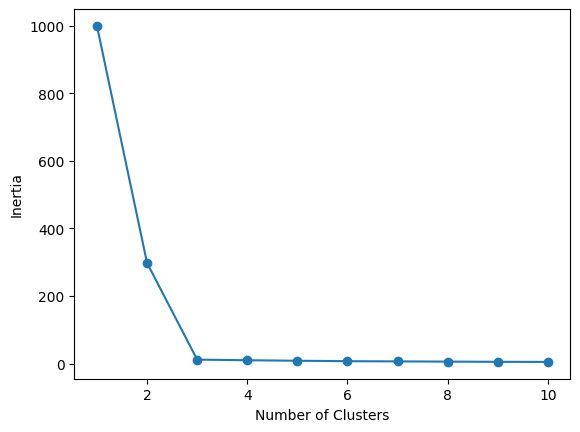

In [79]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [80]:
k_means_final =KMeans(n_clusters=3, random_state=42)
culuster_labels = k_means_final.fit_predict(X_scaled)
culuster_labels

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

In [81]:
df['Culusters'] = culuster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

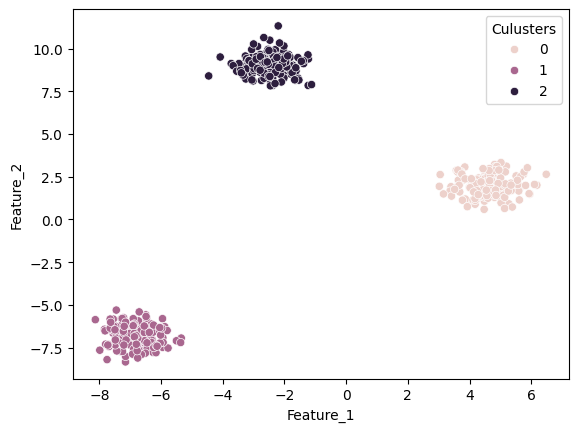

In [82]:
sns.scatterplot(data=df, x='Feature_1', y='Feature_2', hue='Culusters')

In [83]:
from sklearn.datasets import make_moons

X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [84]:
from sklearn.cluster import DBSCAN, KMeans

In [85]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [86]:
k_means= KMeans(n_clusters=2, random_state=42)
k_means_lables = k_means.fit_predict(X_scaled)

In [87]:
db = DBSCAN(eps=0.3, min_samples=5)
db_labels = db.fit_predict(X_scaled)

In [88]:
df["Kmeans_labels"] = k_means_lables
df["DB_labels"] = db_labels

In [89]:
df

,Feature_1,Feature_2,Kmeans_labels,DB_labels
0,0.830586,-0.447733,1,0
1,0.701678,0.816918,0,1
2,1.022080,-0.492571,1,0
3,-0.316765,0.953438,0,1
4,0.293226,1.057185,0,1
...,...,...,...,...
495,0.239754,0.985462,0,1
496,0.072145,0.184834,0,0
497,0.590273,-0.365577,1,0
498,1.619465,-0.283658,1,0


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

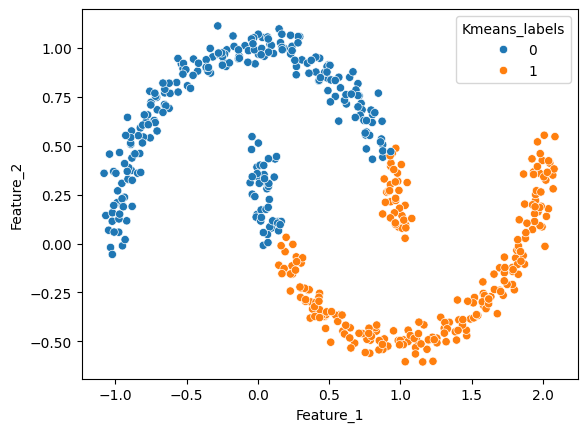

In [90]:
sns.scatterplot(data=df, x='Feature_1', y='Feature_2', hue='Kmeans_labels')

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

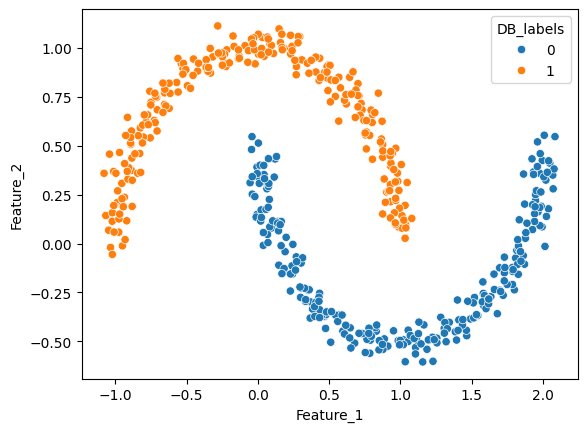

In [91]:
sns.scatterplot(data=df, x='Feature_1', y='Feature_2', hue='DB_labels')

In [92]:
from sklearn.decomposition import PCA

In [93]:
X, y = make_blobs(n_samples=500,n_features=5, centers=3, cluster_std=1.5, random_state=42)

In [97]:
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

In [98]:
df = pd.DataFrame(X_reduced, columns=['Feature_1', 'Feature_2'])
df["lablel"]= y

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

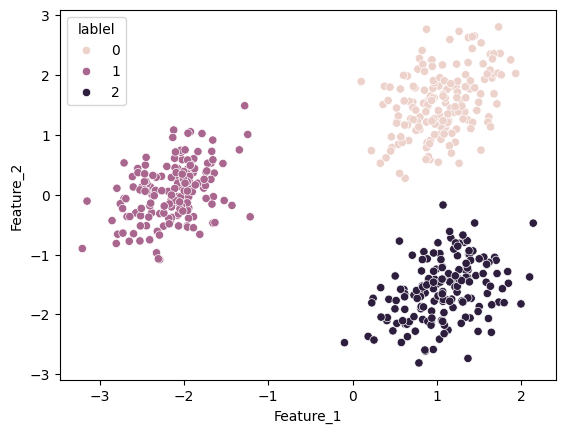

In [99]:
sns.scatterplot(data=df, x='Feature_1', y='Feature_2', hue='lablel')